# Exercise 4.3: User Contribution: series of distributions
prepared by M.Hauser

William Ball sent this plot he made in IDL:

<img src="../figures/ex4_distributions_W_Ball_IDL.png"  width="500">

It shows estimates of latitude-dependent change in total ozone column. We will try to reproduce it in matplotlib.

The plot stems from Ball et al. ([2018](https://www.atmos-chem-phys.net/18/1379/2018/acp-18-1379-2018.html)).


## Import modules

In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr

import seaborn as sns

%matplotlib inline

In [2]:
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['figure.dpi'] = 150

In [3]:
sns.set_style('white')

## Load data

In [4]:
fN = './../data/ex4_distributions_W_Ball.nc'

ds = xr.open_dataset(fN)

ds

<xarray.Dataset>
Dimensions:                       (intervals_stratosphere: 100, intervals_total: 80, latitude: 13, pressure_strat: 4)
Coordinates:
  * pressure_strat                (pressure_strat) float64 0.0 1.0 2.0 3.0
  * latitude                      (latitude) float64 -55.0 -45.0 -35.0 -25.0 ...
  * intervals_stratosphere        (intervals_stratosphere) float64 0.0 1.0 ...
  * intervals_total               (intervals_total) float64 0.0 1.0 2.0 3.0 ...
Data variables:
    yaxis_posterior_stratosphere  (intervals_stratosphere, pressure_strat, latitude) float64 ...
    xaxis_posterior_stratosphere  (intervals_stratosphere, pressure_strat, latitude) float64 ...
    yaxis_posterior_total         (intervals_total, latitude) float64 ...
    xaxis_posterior_total         (intervals_total, latitude) float64 ...

## One distribution

Usually, we would need to calculate the distribution from data. However, this is already done. We start with one of the distributions.

### Exercise
 * plot the distribution
 * plot it such that it is vertical

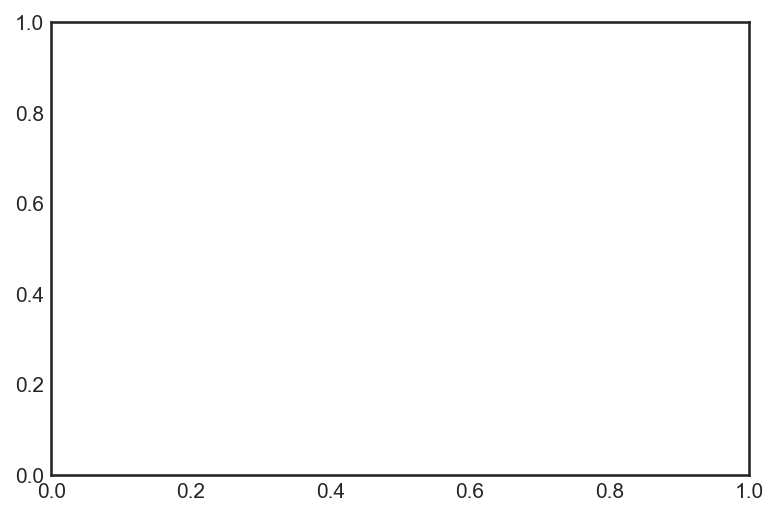

In [5]:
x = ds.xaxis_posterior_total.isel(latitude=-1)
y = ds.yaxis_posterior_total.isel(latitude=-1)

f, ax = plt.subplots(1, 1)



### Solution

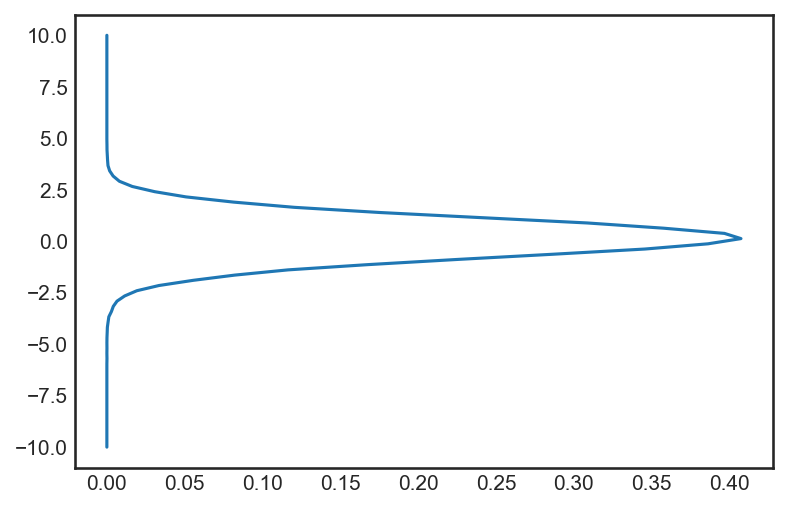

In [6]:
x = ds.xaxis_posterior_total.isel(latitude=-1)
y = ds.yaxis_posterior_total.isel(latitude=-1)

f, ax = plt.subplots(1, 1)

ax.plot(y, x)

## All distrubutions

Let's plot all distributions next to each other

### Exercise
 * plot all distributions and vary the x position

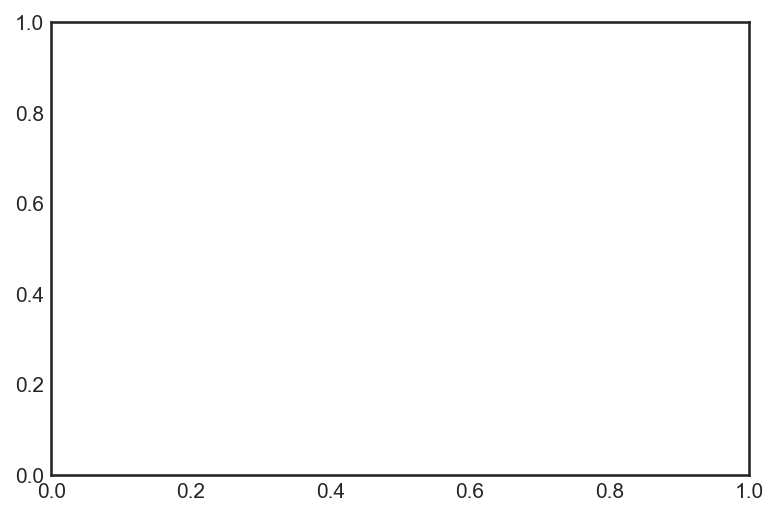

In [7]:
f, ax = plt.subplots(1, 1)


xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

for idx in range(13):
    
    x = xdata.isel(latitude=idx)
    y = ydata.isel(latitude=idx)
    
    # vary the y position
    # ax.plot(y, x)

### Solution

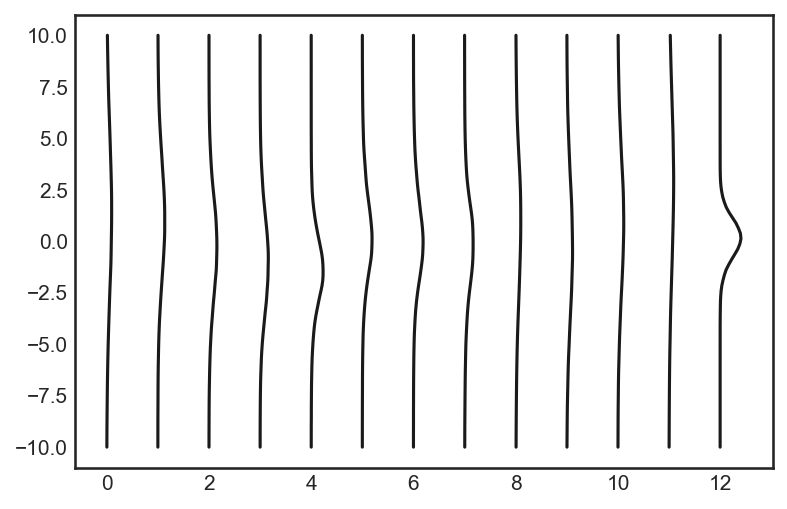

In [8]:
f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

for idx in range(13):
    
    x = xdata.isel(latitude=idx)
    y = ydata.isel(latitude=idx)
    
    ax.plot(y + idx, x, color='0.1')

## x_positions

We need to manually create the `x_position` of the lines. They are too far apart (you can hardly see the bump) and create a larger distance for the rightmost distribution.

### Exercise
 * create a numpy array 0., 1., ..., 11., 13.
 * use it for the x position of the lines
 * multiply `x_position` with a suitable factor

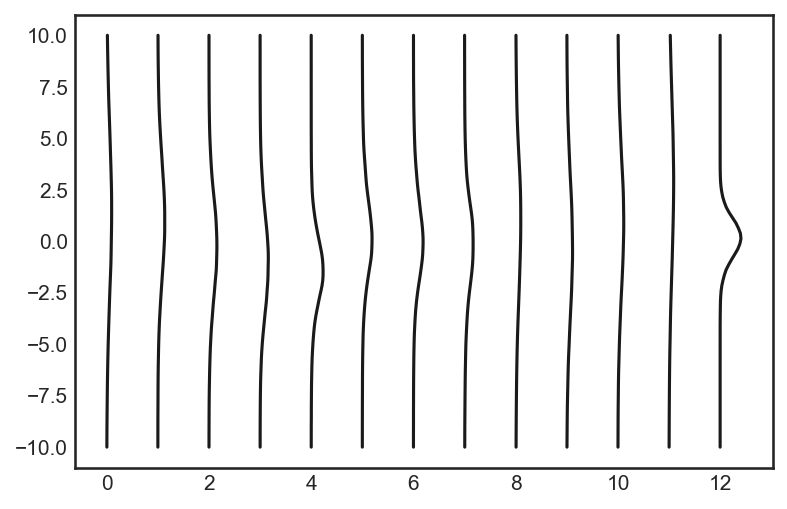

In [9]:
# create x_positions
x_positions = np.arange(13)
# x_positions[-1] = ...
# x_positions = x_positions * ...

# plot

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

for idx in range(13):
    x_pos = x_positions[idx]
    
    x = xdata.isel(latitude=idx)
    y = ydata.isel(latitude=idx)
    
    ax.plot(y + idx, x, color='0.1')



### Solution

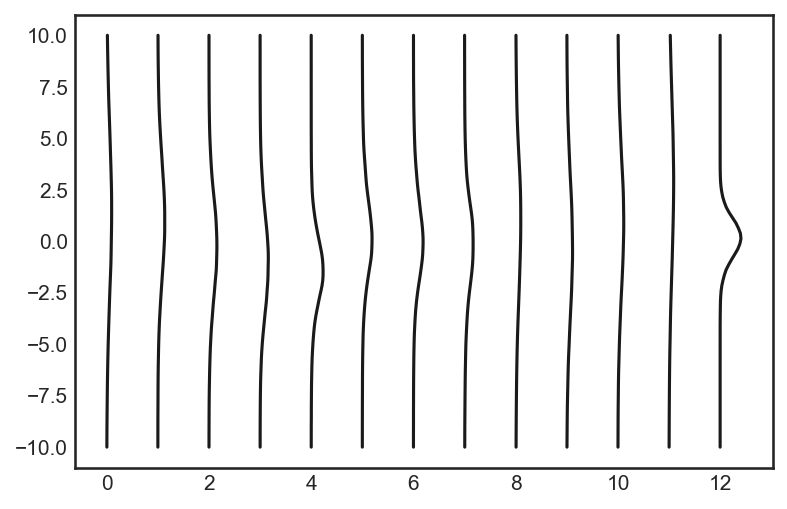

In [10]:
# create x_positions
x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= 0.5

# plot

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

for idx in range(13):
    x_pos = x_positions[idx]
    
    x = xdata.isel(latitude=idx)
    y = ydata.isel(latitude=idx)
    
    ax.plot(y + idx, x, color='0.1')


## fill_between

The distributions should be filled & colored.

### Exercise
 * replace `plot` with `fill_betweenx`
 * you'll have to think about how to choose `y`, `x1`, and `x2`
 * use `axvline` to add a vertical line at each distribution

In [ ]:
plt.fill_betweenx?

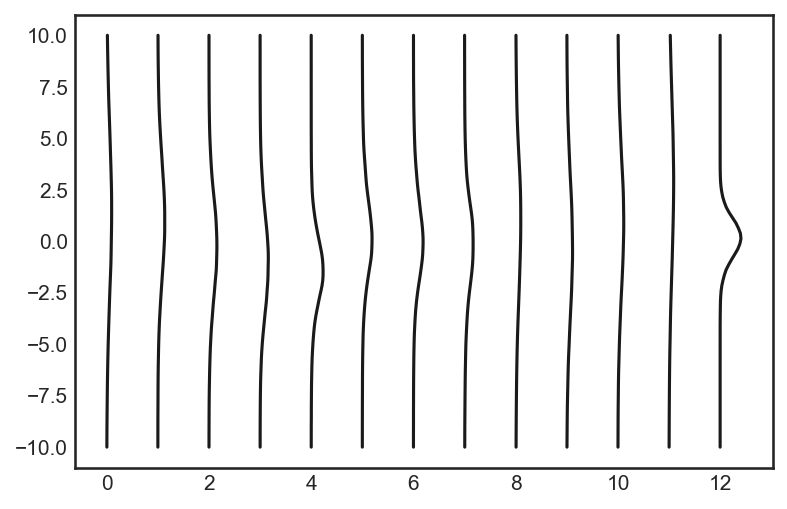

In [11]:
# create x_positions
x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= 0.5

# plot

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

for idx in range(13):
    x_pos = x_positions[idx]
    
    x = xdata.isel(latitude=idx)
    y = ydata.isel(latitude=idx)
    
    ax.plot(y + idx, x, color='0.1')

### Solution

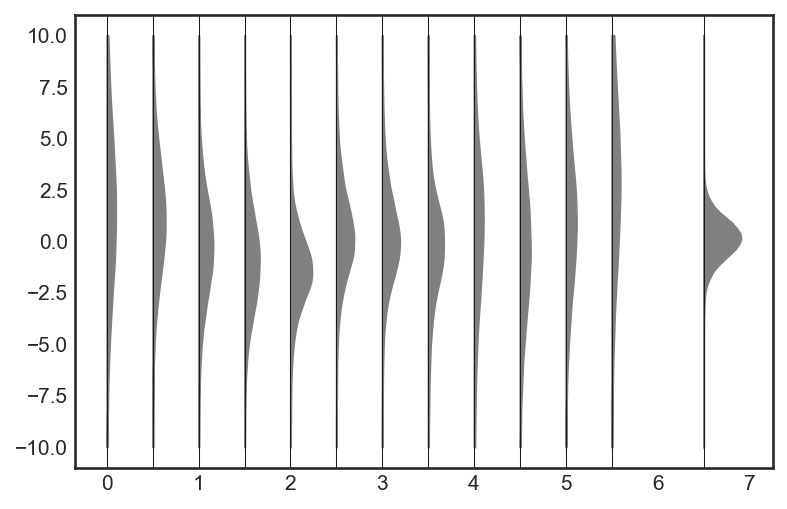

In [12]:
# create x_positions
x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= 0.5

# plot

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

for idx in range(13):
    x_pos = x_positions[idx]
    
    x = xdata.isel(latitude=idx)
    y = ydata.isel(latitude=idx)
    
    ax.fill_betweenx(x, x_pos, y + x_pos, color='0.5')
    
    ax.axvline(x_pos, color='0.1', lw=0.5)
    

## Coloring according to value

The coloring is according to the percentage of the distribution that is below 0. If more than 50 % if above it's red, if more than 50 % is below, it's blue. We'll calculate this using by integrate $\int_{-\infty}^{0} y(x) \mathrm{d}x$ using the trapezoidal rule (`np.trapz`).

If you pass a value between 0 and 1 to a colormap it returns the appropriate color. We can use this to set the color.

### Exercise

 * [find a suitable colormap](http://colorbrewer2.org/)
 * test if this works below

In [13]:
cmap = plt.get_cmap('Greys')

print(cmap(0.1))
print(cmap(0.8))

(0.9538638985005767, 0.9538638985005767, 0.9538638985005767, 1.0)
(0.25098039215686274, 0.25098039215686274, 0.25098039215686274, 1.0)


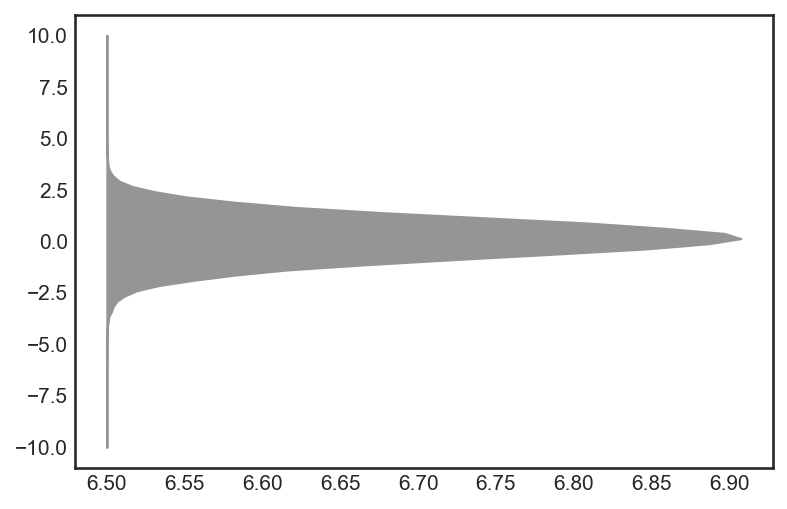

In [14]:
f, ax = plt.subplots(1, 1)

# try different 'values'
value = 0.5
color = cmap(value)

ax.fill_betweenx(x, x_pos, y + x_pos, color=color)

### Exercise
 * use the right cmap
 * select color according to perc
 * color `fill_betweenx` with the selected color
 * add a text label at `text_y = 9` indicating the perc. You can use the formatted string `s`

In [15]:
'{:2.0f}'.format((0.25751 * 100))

'26'

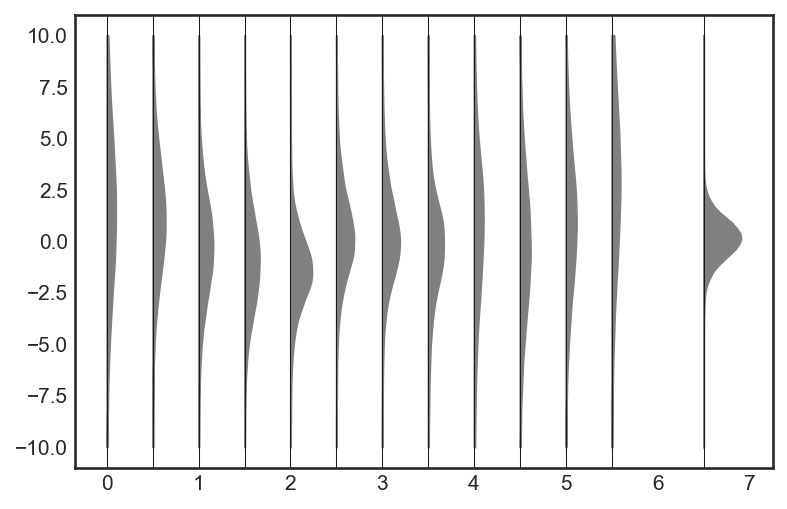

In [16]:
# create x_positions
x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= 0.5

text_y = 9

# choose colormap
cmap = plt.get_cmap('Greys')

# plot

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

for idx in range(13):
    x_pos = x_positions[idx]
    
    x = xdata.isel(latitude=idx)
    y = ydata.isel(latitude=idx)
    
    # determine fraction below 0
    sel = x <= 0
    perc = np.trapz(y=y[sel], x=x[sel])
    
    # select color according to perc

    # set color
    ax.fill_betweenx(x, x_pos, y + x_pos, color='0.5')
    
    # add text label
    s = '{:2.0f}'.format((perc * 100))
    # ax.text(...)
    
    ax.axvline(x_pos, color='0.1', lw=0.5)
    

### Solution

In [ ]:
# create x_positions
x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= 0.5

text_y = 9

# choose colormap
cmap = plt.get_cmap('RdBu')

# plot

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

for idx in range(13):
    x_pos = x_positions[idx]
    
    x = xdata.isel(latitude=idx)
    y = ydata.isel(latitude=idx)
    
    # determine fraction below 0
    sel = x <= 0
    perc = np.trapz(y=y[sel], x=x[sel])
    
    # select color according to perc
    color = cmap(perc)
    
    # set color
    ax.fill_betweenx(x, x_pos, y + x_pos, color=color)

    # add text label
    s = '{:2.0f}'.format((perc * 100))
    ax.text(x_pos + 0.05, text_y, s, fontsize=8)
    
    ax.axvline(x_pos, color='0.1', lw=0.5)
    

## Write functions

It's time to write functions for the plotting

### Exercise
* write a function that plots the distribution
  * It should have the following signature: `plot_distr(xdata, ydata, x_positions, ax, text_y):`
* write a function to format the axes
  * currently this function will only contain the loop and `axvline`, we will add more later
  * It should have the following signature: `format_ax(ax, x_positions)`
  * don't forget to delete the `axvline` commant in `plot_distr` 
  
* you can remove the `pass` command once you're done

In [ ]:
# ==========================================
# put this part into the two function

for idx in range(13):

    x = ds.xaxis_posterior_total.isel(latitude=idx)
    y = ds.yaxis_posterior_total.isel(latitude=idx)
    x_pos = x_positions[idx]

    # determine fraction below 0
    sel = x <= 0
    perc = np.trapz(y=y[sel], x=x[sel])
    color = cmap(perc)
    
    ax.fill_betweenx(x, x_pos, y + x_pos, color=color)
    
    ax.axvline(x_pos, color='0.1', lw=0.5)
    
    
    ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)
    
    
# ==========================================

def plot_distr(xdata, ydata, x_positions, ax, text_y):
    pass

# =================

def format_ax(ax, x_positions):
    pass

# ==========================================

x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= 0.5

text_y = 9

# =================

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

plot_distr(xdata, ydata, x_positions, ax, text_y)
format_ax(ax, x_positions)

### Solution

In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        ax.fill_betweenx(x, x_pos, y + x_pos, color=color)

        ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)

# ==========================================

def format_ax(ax, x_positions):
    
    for idx in range(13):
        x_pos = x_positions[idx]
        ax.axvline(x_pos, color='0.1', lw=0.5)

# ==========================================

x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= 0.5

text_y = 9

# =================

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

plot_distr(xdata, ydata, x_positions, ax, text_y)
format_ax(ax, x_positions)

## format the axes

### Exercise
* use `sns.despine` to get rid of the bottom, top, and right spine
* set the facecolor of the axes to `'0.9'`
* set the ticks (`ax.set_xticks`, `ax.set_xticklabels`)

In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        ax.fill_betweenx(x, x_pos, y + x_pos, color=color)

        ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)

# ==========================================

def format_ax(ax, x_positions, latitude):
    
    lat_ticklabels = list()
    for idx in range(13):
        x_pos = x_positions[idx]
        ax.axvline(x_pos, color='0.1', lw=0.5)

        lat_ticklabels.append(latitude[idx])
        
    # set ticks
    
    # set facecolor
    
    # despine the axes
        
# ==========================================

x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= 0.5

text_y = 9

# =================

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

plot_distr(xdata, ydata, x_positions, ax, text_y)
format_ax(ax, x_positions, ds.latitude.values)

### Solution

In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        ax.fill_betweenx(x, x_pos, y + x_pos, color=color)

        ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)

# ==========================================

def format_ax(ax, x_positions, latitude):
    
    lat_ticklabels = list()
    for idx in range(13):
        x_pos = x_positions[idx]
        ax.axvline(x_pos, color='0.1', lw=0.5)

        lat_ticklabels.append(latitude[idx])
        
    # set ticks
    ax.set_xticks(x_positions);
    ax.set_xticklabels(lat_ticklabels, fontsize=7);
    
    # set facecolor
    ax.set_facecolor('0.90')

    # despine the axes
    sns.despine(bottom=True)
        
# ==========================================

x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= 0.5

text_y = 9

# =================

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

plot_distr(xdata, ydata, x_positions, ax, text_y)
format_ax(ax, x_positions, ds.latitude.values)

## Format ticklabels

### Exercise
 * use LATITUDE_FORMATTER to format the latitues, e.g. 30°N
 * set the last label manually to `'60°S to 60°N'`

In [ ]:
from cartopy.mpl.gridliner import LATITUDE_FORMATTER

LATITUDE_FORMATTER(30)

In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        ax.fill_betweenx(x, x_pos, y + x_pos, color=color)

        ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)

# ==========================================

def format_ax(ax, x_positions, latitude):
    
    lat_ticklabels = list()
    for idx in range(13):
        x_pos = x_positions[idx]
        ax.axvline(x_pos, color='0.1', lw=0.5)

        # change formatting of latitude
        lat_ticklabels.append(latitude[idx])
        
    # change formatting last latitude
    # lat_ticklabels[-1] = 
    
    # set ticks
    ax.set_xticks(x_positions);
    ax.set_xticklabels(lat_ticklabels, fontsize=7);
    
    # set facecolor
    ax.set_facecolor('0.90')

    # despine the axes
    sns.despine(bottom=True)
        
# ==========================================

x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= 0.5

text_y = 9

# =================

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

plot_distr(xdata, ydata, x_positions, ax, text_y)
format_ax(ax, x_positions, ds.latitude.values)

### Solution

In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        ax.fill_betweenx(x, x_pos, y + x_pos, color=color)

        ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)

# ==========================================

def format_ax(ax, x_positions, latitude):
    
    lat_ticklabels = list()
    for idx in range(13):
        x_pos = x_positions[idx]
        ax.axvline(x_pos, color='0.1', lw=0.5)

        lat_ticklabels.append(LATITUDE_FORMATTER(latitude[idx]))
        
        
    lat_ticklabels[-1] = '60°S to 60°N'

    # set ticks
    ax.set_xticks(x_positions);
    ax.set_xticklabels(lat_ticklabels, fontsize=7);
    
    # set facecolor
    ax.set_facecolor('0.90')

    # despine the axes
    sns.despine(bottom=True)
        
# ==========================================

x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= 0.5

text_y = 9

# =================

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

plot_distr(xdata, ydata, x_positions, ax, text_y)
format_ax(ax, x_positions, ds.latitude.values)

## Height  levels

Let's add the braces and height levels:

100 - 1$\,$hPa <br>
13 - 48$\,$km

### Exercise
* make room for the text by using `set_ylim`
* adjust the new `add_text` function
  * we'll abuse `ax.plot` with `marker='|'` to create pseudo-braces
    * play with the keyword arguments `mew`, `lw`, and `ms`, to create good braces
  * add a the text with `ax.text`
    * adjust the horizontal and vertical alignment (`ha` and `va`)
    * set `fontsize=6`, and `usetex=True` (to force Latex rendering)
    * use `bbox=dict(...)` to define the face_color and edge_color of the text box


In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        ax.fill_betweenx(x, x_pos, y + x_pos, color=color)

        ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)

# ==========================================

def format_ax(ax, x_positions, latitude):
    
    lat_ticklabels = list()
    for idx in range(13):
        x_pos = x_positions[idx]
        ax.axvline(x_pos, color='0.1', lw=0.5)

        lat_ticklabels.append(LATITUDE_FORMATTER(latitude[idx]))
        
        
    lat_ticklabels[-1] = '60°S to 60°N'

    # set ticks
    ax.set_xticks(x_positions);
    ax.set_xticklabels(lat_ticklabels, fontsize=7);
    
    # set facecolor
    ax.set_facecolor('0.90')

    # despine the axes
    sns.despine(bottom=True)
    
    # set_ylim
        
# ==========================================

def add_text(xmin, xmax, msg, dx, y_pos=13):

    x = [xmin * dx, (xmax + 0.75) * dx]
    y = [y_pos, y_pos]
    
    # add 'braces'
    # ax.plot(x, y, marker='|', mew=XX, ms=YY, lw=1, color='0.1')

    # add text
    x_pos = np.mean(x)
    # ax.text(x_pos, y_pos, msg, );

# ==========================================

dx = 0.5
x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= dx

text_y = 9

# =================

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

plot_distr(xdata, ydata, x_positions, ax, text_y)
format_ax(ax, x_positions, ds.latitude.values)


add_text(0, 2, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)
add_text(3, 8, '100 -- 1$\,$hPa\n17 -- 48$\,$km', dx)
add_text(9, 11, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)

### Solution

In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        ax.fill_betweenx(x, x_pos, y + x_pos, color=color)

        ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)

# ==========================================

def format_ax(ax, x_positions, latitude):
    
    lat_ticklabels = list()
    for idx in range(13):
        x_pos = x_positions[idx]
        ax.axvline(x_pos, color='0.1', lw=0.5)

        lat_ticklabels.append(LATITUDE_FORMATTER(latitude[idx]))
        
    lat_ticklabels[-1] = '60°S to 60°N'

    # set ticks
    ax.set_xticks(x_positions);
    ax.set_xticklabels(lat_ticklabels, fontsize=7);
    
    # set facecolor
    ax.set_facecolor('0.90')

    # despine the axes
    sns.despine(bottom=True)
    
    # set_ylim
    ax.set_ylim(-10, 15)
    
# ==========================================

def add_text(xmin, xmax, msg, dx, y_pos=13):

    x = [xmin * dx, (xmax + 0.75) * dx]
    y = [y_pos, y_pos]
    
    # add 'braces'
    ax.plot(x, y, marker='|', mew=1, ms=10, lw=1, color='0.1')

    # add text
    x_pos = np.mean(x)
    ax.text(x_pos, y_pos, msg, ha='center', va='center',
            bbox=dict(fc='0.9', ec='none'), fontsize=6, usetex=True);

# ==========================================

dx = 0.5
x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= dx

text_y = 9

# =================

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

plot_distr(xdata, ydata, x_positions, ax, text_y)
format_ax(ax, x_positions, ds.latitude.values)


add_text(0, 2, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)
add_text(3, 8, '100 -- 1$\,$hPa\n17 -- 48$\,$km', dx)
add_text(9, 11, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)

## shrink lines and title

Now the vertical lines are too long

### Exercise
 * `axvline` takes a `ymax` keyword. Use it to restrict the line to -10..10
 * we have to get rid of the left spine as well
 * create a manual spine with `ax.axvline(-0.25, color='0.1', lw=3, solid_capstyle='butt', ymax=??)`
 * you will have to manually set the xlim to do this
 * only label the ticks from -10...10
 * write 'Total and stratospheric column ozone' as title to the left
 * write 'Global' as title to the right

In [ ]:
plt.axvline?

In [ ]:
ax.set_title?

In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        ax.fill_betweenx(x, x_pos, y + x_pos, color=color)

        ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)

# ==========================================

def format_ax(ax, x_positions, latitude):
    
    lat_ticklabels = list()
    for idx in range(13):
        x_pos = x_positions[idx]
        
        # adjust axvline
        ax.axvline(x_pos, color='0.1', lw=0.5)

        lat_ticklabels.append(LATITUDE_FORMATTER(latitude[idx]))
        
    lat_ticklabels[-1] = '60°S to 60°N'

    # set ticks
    ax.set_xticks(x_positions);
    ax.set_xticklabels(lat_ticklabels, fontsize=7);
    
    # set facecolor
    ax.set_facecolor('0.90')

    # despine the axes
    sns.despine(bottom=True)
    
    # manually set the yticks
    
    # manually draw the spine using axvline
    
    # set_ylim
    ax.set_ylim(-10, 15)
    
    # set_xlim  

# ==========================================

def add_text(xmin, xmax, msg, dx, y_pos=13):

    x = [xmin * dx, (xmax + 0.75) * dx]
    y = [y_pos, y_pos]
    
    # add 'braces'
    ax.plot(x, y, marker='|', mew=1, ms=10, lw=1, color='0.1')

    # add text
    x_pos = np.mean(x)
    ax.text(x_pos, y_pos, msg, ha='center', va='center',
            bbox=dict(fc='0.9', ec='none'), fontsize=6, usetex=True);

# ==========================================

dx = 0.5
x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= dx

text_y = 9

# =================

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

plot_distr(xdata, ydata, x_positions, ax, text_y)
format_ax(ax, x_positions, ds.latitude.values)


add_text(0, 2, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)
add_text(3, 8, '100 -- 1$\,$hPa\n17 -- 48$\,$km', dx)
add_text(9, 11, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)

### Solution

In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        ax.fill_betweenx(x, x_pos, y + x_pos, color=color)

        ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)

# ==========================================

def format_ax(ax, x_positions, latitude):
    
    lat_ticklabels = list()
    for idx in range(13):
        x_pos = x_positions[idx]
        
        # adjust axvline
        ax.axvline(x_pos, color='0.1', lw=0.5, ymax=20/25.)

        lat_ticklabels.append(LATITUDE_FORMATTER(latitude[idx]))
        
    lat_ticklabels[-1] = '60°S to 60°N'

    # set ticks
    ax.set_xticks(x_positions);
    ax.set_xticklabels(lat_ticklabels, fontsize=7);
    
    # set facecolor
    ax.set_facecolor('0.90')

    # despine the axes
    sns.despine(bottom=True, left=True)
    
    # manually draw the spine using axvline
    ax.axvline(-0.25, color='0.1', lw=3, solid_capstyle='butt', ymax=20/25.)
    
    # manually set the yticks
    ax.set_yticks(np.arange(-10, 11, 5)) 
    
    # set_ylim
    ax.set_ylim(-10, 15)
    
    # set_xlim  
    ax.set_xlim(-0.25, None)
    
# ==========================================

def add_text(xmin, xmax, msg, dx, y_pos=13):

    x = [xmin * dx, (xmax + 0.75) * dx]
    y = [y_pos, y_pos]
    
    # add 'braces'
    ax.plot(x, y, marker='|', mew=1, ms=10, lw=1, color='0.1')

    # add text
    x_pos = np.mean(x)
    ax.text(x_pos, y_pos, msg, ha='center', va='center',
            bbox=dict(fc='0.9', ec='none'), fontsize=6, usetex=True);

# ==========================================

dx = 0.5
x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= dx

text_y = 9

# =================

f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total

plot_distr(xdata, ydata, x_positions, ax, text_y)
format_ax(ax, x_positions, ds.latitude.values)


add_text(0, 2, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)
add_text(3, 8, '100 -- 1$\,$hPa\n17 -- 48$\,$km', dx)
add_text(9, 11, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)

ax.set_title('Total and stratospheric column ozone', loc='left')
ax.set_title('Global', loc='right')

## Adding the second row of distributions

When we now add the secont row of distributions we are not happy yet with the result

### Exercise
 * make the filled area slightly transparent (`alpha=0.8`)
 * then some of them get very pale, set the `edgecolor='0.1'` (change `color` to `facecolor`)

In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        sel = x < 10
        ax.fill_betweenx(x[sel], x_pos, y[sel] + x_pos, color=color)

        ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)

# ==========================================

def format_ax(ax, x_positions, latitude):
    
    lat_ticklabels = list()
    for idx in range(13):
        x_pos = x_positions[idx]
        
        # adjust axvline
        ax.axvline(x_pos, color='0.1', lw=0.5, ymax=20/25.)

        lat_ticklabels.append(LATITUDE_FORMATTER(latitude[idx]))
        
    lat_ticklabels[-1] = '60°S to 60°N'

    # set ticks
    ax.set_xticks(x_positions);
    ax.set_xticklabels(lat_ticklabels, fontsize=7);
    
    # set facecolor
    ax.set_facecolor('0.90')

    # despine the axes
    sns.despine(bottom=True, left=True)
    
    # manually draw the spine using axvline
    ax.axvline(-0.25, color='0.1', lw=3, solid_capstyle='butt', ymax=20/25.)
    
    # manually set the yticks
    ax.set_yticks(np.arange(-10, 11, 5)) 
    
    # set_ylim
    ax.set_ylim(-10, 15)
    
    # set_xlim  
    ax.set_xlim(-0.25, None)
    
# ==========================================

def add_text(xmin, xmax, msg, dx, y_pos=13):

    x = [xmin * dx, (xmax + 0.75) * dx]
    y = [y_pos, y_pos]
    
    # add 'braces'
    ax.plot(x, y, marker='|', mew=1, ms=10, lw=1, color='0.1')

    # add text
    x_pos = np.mean(x)
    ax.text(x_pos, y_pos, msg, ha='center', va='center',
            bbox=dict(fc='0.9', ec='none'), fontsize=6, usetex=True);

# ==========================================

dx = 0.5
x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= dx

text_y = 9

# ==========================================


f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total
plot_distr(xdata, ydata, x_positions, ax, -9.8)

xdata = ds.xaxis_posterior_stratosphere.isel(pressure_strat=3)
ydata = ds.yaxis_posterior_stratosphere.isel(pressure_strat=3)
plot_distr(xdata, ydata, x_positions, ax, text_y)

format_ax(ax, x_positions, ds.latitude.values)

# ==========================================


add_text(0, 2, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)
add_text(3, 8, '100 -- 1$\,$hPa\n17 -- 48$\,$km', dx)
add_text(9, 11, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)

ax.set_title('Total and stratospheric column ozone', loc='left')
ax.set_title('Global', loc='right')

### Solution

In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        sel = x < 10
        ax.fill_betweenx(x[sel], x_pos, y[sel] + x_pos, facecolor=color, edgecolor='none', alpha=0.8)
        ax.fill_betweenx(x[sel], x_pos, y[sel] + x_pos, facecolor='none', edgecolor='0.1',
                         alpha=0.8, zorder=10, lw=0.5)
        

        ax.text(x_pos + 0.05, text_y, '{:2.0f}'.format((perc * 100)), fontsize=8)

# ==========================================

def format_ax(ax, x_positions, latitude):
    
    lat_ticklabels = list()
    for idx in range(13):
        x_pos = x_positions[idx]
        
        # adjust axvline
        ax.axvline(x_pos, color='0.1', lw=0.5, ymax=20/25.)

        lat_ticklabels.append(LATITUDE_FORMATTER(latitude[idx]))
        
    lat_ticklabels[-1] = '60°S to 60°N'

    # set ticks
    ax.set_xticks(x_positions);
    ax.set_xticklabels(lat_ticklabels, fontsize=7);
    
    # set facecolor
    ax.set_facecolor('0.90')

    # despine the axes
    sns.despine(bottom=True, left=True)
    
    # manually draw the spine using axvline
    ax.axvline(-0.25, color='0.1', lw=3, solid_capstyle='butt', ymax=20/25.)
    
    # manually set the yticks
    ax.set_yticks(np.arange(-10, 11, 5)) 
    
    # set_ylim
    ax.set_ylim(-10, 15)
    
    # set_xlim  
    ax.set_xlim(-0.25, None)
    
# ==========================================

def add_text(xmin, xmax, msg, dx, y_pos=13):

    x = [xmin * dx, (xmax + 0.75) * dx]
    y = [y_pos, y_pos]
    
    # add 'braces'
    ax.plot(x, y, marker='|', mew=1, ms=10, lw=1, color='0.1')

    # add text
    x_pos = np.mean(x)
    ax.text(x_pos, y_pos, msg, ha='center', va='center',
            bbox=dict(fc='0.9', ec='none'), fontsize=6, usetex=True);

# ==========================================

dx = 0.5
x_positions = np.arange(13.)
x_positions[-1] = 13
x_positions *= dx

text_y = 9

# ==========================================


f, ax = plt.subplots(1, 1)

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total
plot_distr(xdata, ydata, x_positions, ax, -9.8)

xdata = ds.xaxis_posterior_stratosphere.isel(pressure_strat=3)
ydata = ds.yaxis_posterior_stratosphere.isel(pressure_strat=3)
plot_distr(xdata, ydata, x_positions, ax, text_y)

format_ax(ax, x_positions, ds.latitude.values)

# ==========================================


add_text(0, 2, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)
add_text(3, 8, '100 -- 1$\,$hPa\n17 -- 48$\,$km', dx)
add_text(9, 11, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)

ax.set_title('Total and stratospheric column ozone', loc='left')
ax.set_title('Global', loc='right')

## Final plot

With this we have arrived at a stage where we can add the other two subplots. It still needed some fiddling to get it to the state you see below. I made the following changes
* make dx larger, due to the narrow distributions in the second panel
* x- and ylim had to be re-set
* the fontsizes had to be adjusted

But all in all it is what we developped together.

In [ ]:
def plot_distr(xdata, ydata, x_positions, ax, text_y, va='top'):
    
    for idx in range(13):

        x = xdata.isel(latitude=idx)
        y = ydata.isel(latitude=idx)
        x_pos = x_positions[idx]

        # determine fraction below 0
        sel = x <= 0
        perc = np.trapz(y=y[sel], x=x[sel])
        color = cmap(perc)

        sel = x < 10
        ax.fill_betweenx(x[sel], x_pos, y[sel] + x_pos, facecolor=color, edgecolor='none', alpha=0.8)
        ax.fill_betweenx(x[sel], x_pos, y[sel] + x_pos, facecolor='none', edgecolor='0.1',
                         alpha=0.8, zorder=10, lw=0.5)
        

        ax.text(x_pos + 0.075, text_y, '{:2.0f}'.format((perc * 100)), fontsize=7, va=va)

# ==========================================

def format_ax(ax, x_positions, latitude):
    
    # set_ylim
    ax.set_ylim(-10, 18)
    
    ymax = 20 / np.diff(ax.get_ylim())
    
    lat_ticklabels = list()
    for idx in range(13):
        x_pos = x_positions[idx]
        
        # adjust axvline
        ax.axvline(x_pos, color='0.1', lw=0.5, ymax=ymax)

        lat_ticklabels.append(LATITUDE_FORMATTER(latitude[idx]))
        
    ax.axhline(0, color='0.1', lw=0.5)
        
    lat_ticklabels[-1] = '60°S to 60°N'

    # set ticks
    ax.set_xticks(x_positions);
    ax.set_xticklabels(lat_ticklabels, fontsize=7);
    
    # set facecolor
    ax.set_facecolor('0.90')

    # despine the axes
    sns.despine(bottom=True, left=True)
    
    # manually draw the spine using axvline
    ax.axvline(-0.25, color='0.1', lw=3, solid_capstyle='butt', ymax=ymax)
    
    # manually set the yticks
    ax.set_yticks(np.arange(-10, 11, 5)) 
    plt.setp(ax.get_yticklabels(), fontsize=7);
    
    # set_xlim  
    ax.set_xlim(-0.25, x_positions[-1] + 1)
    
# ==========================================

def add_text(xmin, xmax, msg, dx, y_pos=15):

    x = [xmin * dx, (xmax + 0.75) * dx]
    y = [y_pos, y_pos]
    
    # add 'braces'
    ax.plot(x, y, marker='|', mew=1, ms=10, lw=1, color='0.1')

    # add text
    x_pos = np.mean(x)
    ax.text(x_pos, y_pos, msg, ha='center', va='center',
            bbox=dict(fc='0.9', ec='none'), fontsize=6, usetex=True);

# ==========================================

dx = 0.8
x_positions = np.arange(13.)
x_positions[-1] = 12.5
x_positions *= dx

text_y = 9.8

fontsize_title = 10

# ==========================================


f, axes = plt.subplots(3, 1)

f.set_size_inches(17 / 2.54, 15 / 2.54)

ax = axes[0]

xdata = ds.xaxis_posterior_total
ydata = ds.yaxis_posterior_total
plot_distr(xdata, ydata, x_positions, ax, -9.8, va='bottom')

xdata = ds.xaxis_posterior_stratosphere.isel(pressure_strat=3)
ydata = ds.yaxis_posterior_stratosphere.isel(pressure_strat=3)
plot_distr(xdata, ydata, x_positions, ax, text_y)

format_ax(ax, x_positions, ds.latitude.values)

ax.set_title('Total and stratospheric column ozone', loc='left', fontsize=fontsize_title)
ax.set_title('Global', loc='right', fontsize=fontsize_title)

ax.set_xticks([])

add_text(0, 2, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)
add_text(3, 8, '100 -- 1$\,$hPa\n17 -- 48$\,$km', dx)
add_text(9, 11, '100 -- 1$\,$hPa\n13 -- 48$\,$km', dx)

# ============

ax = axes[1]

xdata = ds.xaxis_posterior_stratosphere.isel(pressure_strat=0)
ydata = ds.yaxis_posterior_stratosphere.isel(pressure_strat=0)
plot_distr(xdata, ydata, x_positions, ax, text_y)

format_ax(ax, x_positions, ds.latitude.values)

ax.set_title('Upper stratosphere', loc='left', fontsize=fontsize_title)

ax.set_xticks([])

add_text(0, 11, '10 -- 1$\,$hPa\n32 -- 48$\,$km', dx)

# ============

ax = axes[2]

xdata = ds.xaxis_posterior_stratosphere.isel(pressure_strat=2)
ydata = ds.yaxis_posterior_stratosphere.isel(pressure_strat=2)
plot_distr(xdata, ydata, x_positions, ax, text_y)

format_ax(ax, x_positions, ds.latitude.values)

ax.set_title('Lower stratosphere', loc='left', fontsize=fontsize_title)

add_text(0, 2, '147 -- 32$\,$hPa\n13 -- 24$\,$km', dx)
add_text(3, 8, '100 -- 32$\,$hPa\n17 -- 24$\,$km', dx)
add_text(9, 11, '147 -- 32$\,$hPa\n13 -- 24$\,$km', dx)


# ==========================================

for ax in axes:
    ax.set_ylabel("$\Delta$O$_3$ 1998 -- 2016, DU", fontsize=8, usetex=True)

ax.set_xlabel('Central latitude', fontsize=8)

f.tight_layout()

#plt.savefig('ex4_distributions_W_Ball.png', dpi=300)
